In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("bank.csv")
cols=df.columns.values
cols=[col.replace('\"','') for col in cols[0].split(';')]
print(cols)

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [2]:
datas=[]
for i in range(len(df)):
    s=df.iloc[i].values[0]
    datas.append([item.replace('\"','') for item in s.split(';')])
datas=np.array(datas)
print(datas)

[['30' 'unemployed' 'married' ... '0' 'unknown' 'no']
 ['33' 'services' 'married' ... '4' 'failure' 'no']
 ['35' 'management' 'single' ... '1' 'failure' 'no']
 ...
 ['57' 'technician' 'married' ... '0' 'unknown' 'no']
 ['28' 'blue-collar' 'married' ... '3' 'other' 'no']
 ['44' 'entrepreneur' 'single' ... '7' 'other' 'no']]


In [3]:
df_frame={}
for i in range(len(cols)):
    df_frame[cols[i]]=datas[:,i]
df=pd.DataFrame(df_frame)
print(df)

     age            job  marital  education default balance housing loan  \
0     30     unemployed  married    primary      no    1787      no   no   
1     33       services  married  secondary      no    4789     yes  yes   
2     35     management   single   tertiary      no    1350     yes   no   
3     30     management  married   tertiary      no    1476     yes  yes   
4     59    blue-collar  married  secondary      no       0     yes   no   
...   ..            ...      ...        ...     ...     ...     ...  ...   
4516  33       services  married  secondary      no    -333     yes   no   
4517  57  self-employed  married   tertiary     yes   -3313     yes  yes   
4518  57     technician  married  secondary      no     295      no   no   
4519  28    blue-collar  married  secondary      no    1137      no   no   
4520  44   entrepreneur   single   tertiary      no    1136     yes  yes   

       contact day month duration campaign pdays previous poutcome   y  
0     cellular

In [4]:
df[['age','balance','duration','campaign','pdays','previous']]=df[['age','balance','duration','campaign','pdays','previous']].astype(int)
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day          object
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

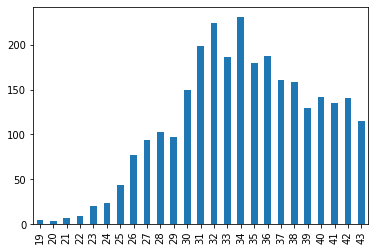

In [5]:
df['age'].value_counts().sort_index().head(25).plot.bar()

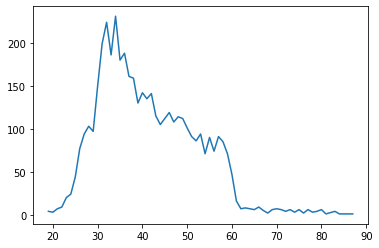

In [6]:
df['age'].value_counts().sort_index().plot.line()

In [7]:
df.drop_duplicates()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [8]:
class_mapping = {'no':0,'yes':1}
df['default'] = df['default'].map(class_mapping)
df['housing'] = df['housing'].map(class_mapping)
df['loan'] = df['loan'].map(class_mapping)
df['y'] = df['y'].map(class_mapping)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,1,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,0,295,0,0,cellular,19,aug,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,0,1137,0,0,cellular,6,feb,129,4,211,3,other,0


In [9]:
month_dict={'oct':'10','may':'05','apr':'04','jun':'06','feb':'02','aug':'08','jan':'01','jul':'07','nov':'11','sep':'09','mar':'03','dec':'12'}
df['month']=df['month'].map(month_dict)
df['date']='2019'+'-'+df['month']+'-'+df['day']
df['date']=pd.to_datetime(df['date'],format="%Y-%m-%d")
df['date']=pd.to_datetime('2020-01-01',format="%Y-%m-%d")-df['date']
df['date']=df['date'].dt.days
print(df[['date']])

      date
0       74
1      235
2      260
3      212
4      241
...    ...
4516   155
4517   237
4518   135
4519   329
4520   273

[4521 rows x 1 columns]


In [10]:
del(df['day'])
del(df['month'])

In [11]:
jobs=df['job'].unique()
job_mapping={jobs[i]:i for i in range(jobs.shape[0])}

maritals=df['marital'].unique()
marital_mapping={maritals[i]:i for i in range(maritals.shape[0])}

educations=df['education'].unique()
education_mapping={educations[i]:i for i in range(educations.shape[0])}

contacts=df['contact'].unique()
contact_mapping={contacts[i]:i for i in range(contacts.shape[0])}

poutcomes=df['poutcome'].unique()
poutcome_mapping={poutcomes[i]:i for i in range(poutcomes.shape[0])}

df['marital']=df['marital'].map(marital_mapping)
df['job']=df['job'].map(job_mapping)
df['education']=df['education'].map(education_mapping)
df['contact']=df['contact'].map(contact_mapping)
df['poutcome']=df['poutcome'].map(poutcome_mapping)
df

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,date
0,30,0,0,0,0,1787,0,0,0,79,1,-1,0,0,0,74
1,33,1,0,1,0,4789,1,1,0,220,1,339,4,1,0,235
2,35,2,1,2,0,1350,1,0,0,185,1,330,1,1,0,260
3,30,2,0,2,0,1476,1,1,1,199,4,-1,0,0,0,212
4,59,3,0,1,0,0,1,0,1,226,1,-1,0,0,0,241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,1,0,1,0,-333,1,0,0,329,5,-1,0,0,0,155
4517,57,4,0,2,1,-3313,1,1,1,153,1,-1,0,0,0,237
4518,57,5,0,1,0,295,0,0,0,151,11,-1,0,0,0,135
4519,28,3,0,1,0,1137,0,0,0,129,4,211,3,2,0,329


In [12]:
bins=[18,25,35,45,55,100]#定年龄的分界点
df['age']= pd.cut(df['age'], bins, labels=False)
bins=[-np.inf,4137.1,11587.2,np.inf]
df['balance']= pd.cut(df['balance'], bins, labels=False)
print(df[[ 'age', 'balance']])

      age  balance
0       1        0
1       1        1
2       1        0
3       1        0
4       4        0
...   ...      ...
4516    1        0
4517    4        0
4518    4        0
4519    1        0
4520    2        0

[4521 rows x 2 columns]


In [13]:
cols = ['pdays','duration','campaign','date']
for col in cols:
    df[col] = (df[col] - df[col].min())/(df[col].max()-df[col].min())
print(df[['pdays','duration','campaign','date']])

         pdays  duration  campaign      date
0     0.000000  0.024826  0.000000  0.203911
1     0.389908  0.071500  0.000000  0.653631
2     0.379587  0.059914  0.000000  0.723464
3     0.000000  0.064548  0.061224  0.589385
4     0.000000  0.073486  0.000000  0.670391
...        ...       ...       ...       ...
4516  0.000000  0.107580  0.081633  0.430168
4517  0.000000  0.049321  0.000000  0.659218
4518  0.000000  0.048659  0.204082  0.374302
4519  0.243119  0.041377  0.061224  0.916201
4520  0.286697  0.112877  0.020408  0.759777

[4521 rows x 4 columns]


In [14]:
df.to_csv('after_bank.csv')

In [28]:
from sklearn.tree import DecisionTreeClassifier as DTC, export_graphviz
# 读取数据
df = pd.read_csv("after_bank.csv")
df = df.iloc[:,1:]
cols = list(df.columns.values)
cols.remove('y')
X = df[cols]
y = df[['y']]
# 划分训练集和测试集
X_train = X[:4000]
y_train = y[:4000]
X_test = X[4000:5000]
y_test = y[4000:5000]
# 训练模型
dtc = DTC(criterion='entropy', max_depth=5)
dtc.fit(X_train, y_train)
print( '准确率: ', dtc.score(X_test, y_test))
# 参数调整
DTC(criterion="gini",
    splitter="random",
    max_depth=50,
    min_samples_split=20,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.,
    min_impurity_split=None,
    class_weight=None,
    presort=False)
for depth in range(1, 20):
    dtc = DTC(criterion='entropy', max_depth = depth)
    dtc.fit(X_train, y_train)
    print(' depth:', depth, '|','准确率:', dtc.score(X_test, y_test))
# 可视化决策树模型

准确率:  0.8886756238003839
 depth: 1 | 准确率: 0.8790786948176583
 depth: 2 | 准确率: 0.8714011516314779
 depth: 3 | 准确率: 0.8925143953934741
 depth: 4 | 准确率: 0.8905950095969289
 depth: 5 | 准确率: 0.8886756238003839
 depth: 6 | 准确率: 0.8829174664107485
 depth: 7 | 准确率: 0.8944337811900192
 depth: 8 | 准确率: 0.8963531669865643
 depth: 9 | 准确率: 0.8944337811900192
 depth: 10 | 准确率: 0.8963531669865643
 depth: 11 | 准确率: 0.8829174664107485
 depth: 12 | 准确率: 0.8848368522072937
 depth: 13 | 准确率: 0.8771593090211133
 depth: 14 | 准确率: 0.8637236084452975
 depth: 15 | 准确率: 0.8752399232245681
 depth: 16 | 准确率: 0.8714011516314779
 depth: 17 | 准确率: 0.8694817658349329
 depth: 18 | 准确率: 0.8714011516314779
 depth: 19 | 准确率: 0.8790786948176583


In [16]:
from IPython.display import Image
from sklearn import tree
import pydotplus
import os
os.environ["PATH"]+=os.pathsep+'E:/Junior/BigData/lab2/Graphviz 2.44.1/bin'
dot_data=tree.export_graphviz(dtc,out_file=None,
                             feature_names=X_train.columns,
                             class_names=['1','0'],
                             filled=True,rounded=True,
                             special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_png("DecisionTree.gif")
Image(graph.create_png())

InvocationException: GraphViz's executables not found